https://www.youtube.com/watch?v=9xZa4FAfKgY

In [1]:
# pip install opencv-python

# pip install tensorflow-datasets==4.6.0
# 'cats_vs_dogs'는 tfds 버전 4.6.0 에서만 실행됨

## tfds 에러 해결
# pip install tfds-nightly

import cv2
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds
import tensorflow as tf

c:\Users\sjbang\anaconda3\envs\tf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
# URL 변경 오류 시 다시 세팅
setattr(tfds.image_classification.cats_vs_dogs, '_URL',"https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip")

In [2]:
data_train, ds_info = tfds.load('cats_vs_dogs', split=[tfds.Split.TRAIN], with_info=True)
ds_info

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]WARNING:absl:1738 images were corrupted and were skipped
                                                                        

Dataset cats_vs_dogs downloaded and prepared to ~\tensorflow_datasets\cats_vs_dogs\4.0.0. Subsequent calls will reuse this data.


tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.0',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_path='~\\tensorflow_datasets\\cats_vs_dogs\\4.0.0',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=689.64 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=8>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon 

In [3]:
images = [one['image'].numpy() for one in data_train[0].take(30)]
len(images)

30

(-0.5, 499.5, 359.5, -0.5)

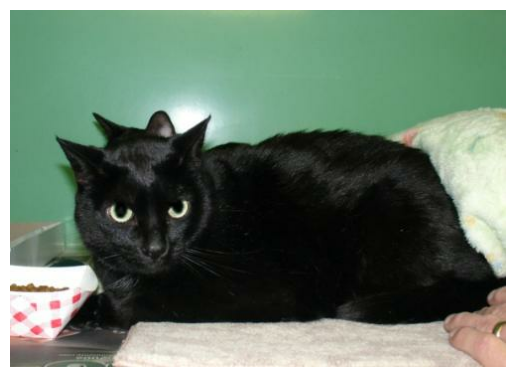

In [4]:
plt.imshow(images[11])
plt.axis('off')

In [5]:
resnet50_pre = tf.keras.applications.resnet.ResNet50(weights='imagenet', input_shape=(224, 224, 3))
resnet50_pre.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [6]:
from tensorflow.keras.applications.imagenet_utils import decode_predictions

In [7]:
def pred_img(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    img_resized = cv2.resize(img, (224,224))
    pred = resnet50_pre.predict(img_resized.reshape([1, 224,224, 3]))
    decoded_pred = decode_predictions(pred)

    for i, instance in enumerate(decoded_pred[0]):
        print('{}위: {} ({:.2f}%)'.format(i+1, instance[1], instance[2] * 100))

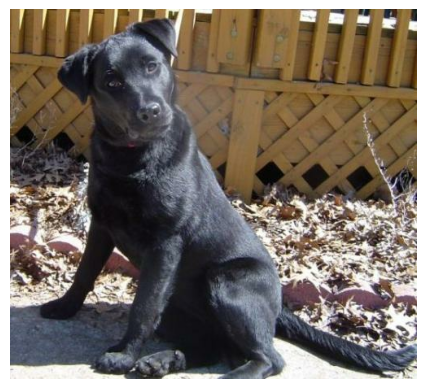

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1위: kelpie (54.73%)
2위: Chesapeake_Bay_retriever (37.84%)
3위: Labrador_retriever (1.33%)
4위: miniature_pinscher (1.28%)
5위: schipperke (0.73%)


In [8]:
pred_img(images[17])

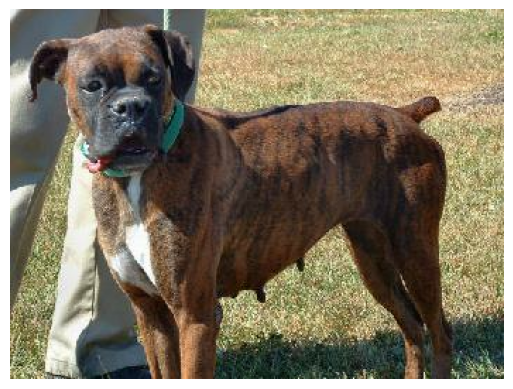

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1위: boxer (84.50%)
2위: German_short-haired_pointer (9.20%)
3위: Weimaraner (2.95%)
4위: Great_Dane (0.90%)
5위: giant_schnauzer (0.42%)


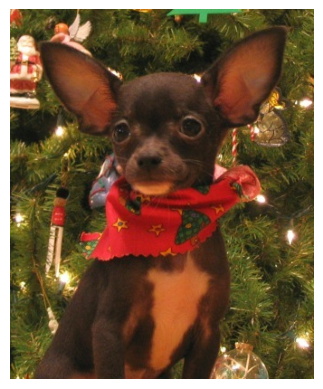

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1위: Chihuahua (90.09%)
2위: miniature_pinscher (4.65%)
3위: French_bulldog (2.58%)
4위: Boston_bull (0.80%)
5위: boxer (0.45%)


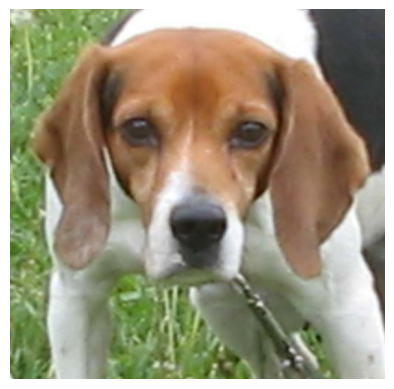

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1위: German_short-haired_pointer (32.21%)
2위: beagle (31.17%)
3위: Weimaraner (20.55%)
4위: bluetick (5.85%)
5위: English_setter (3.35%)


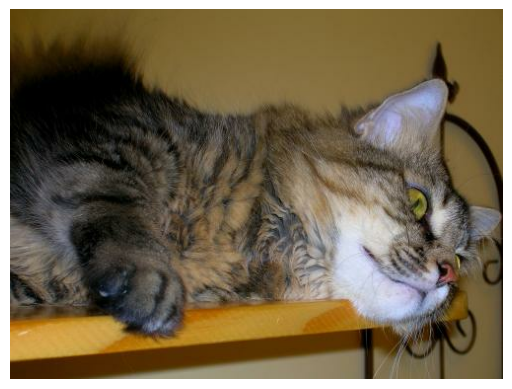

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1위: tabby (43.60%)
2위: lynx (16.35%)
3위: tiger_cat (14.93%)
4위: Egyptian_cat (6.43%)
5위: Persian_cat (3.99%)


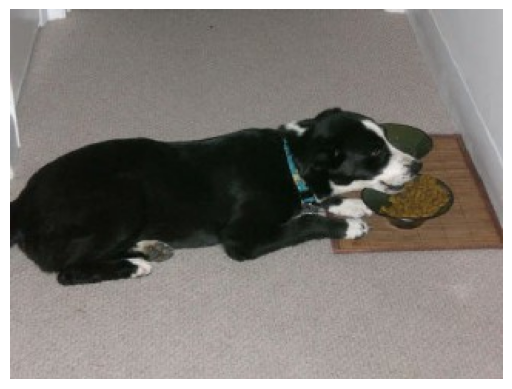

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1위: Boston_bull (16.58%)
2위: Appenzeller (11.26%)
3위: Staffordshire_bullterrier (9.44%)
4위: Greater_Swiss_Mountain_dog (8.46%)
5위: collie (7.79%)


In [9]:
for n in range(5):
    pred_img(images[n])